# Facial Keypoint Detection Kaggle Competition

Kaggle competition to detect eyes, mouth and nose in grayscaled images.

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%aimport keypoints
%aimport plots

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(X, Y) = keypoints.df_train()

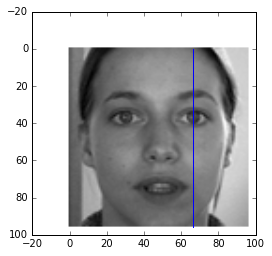

In [20]:
plots.show_img(X, Y, 12)

In [21]:
model = keypoints.train(X, Y)
(ids, Xtest) = keypoints.df_test()
Ytest = pd.DataFrame(model.predict(Xtest))

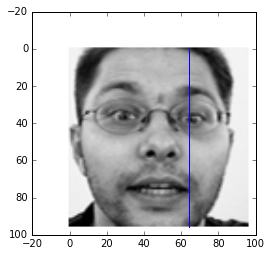

In [22]:
plots.show_img(Xtest, Ytest, 0)